<a href="https://colab.research.google.com/github/Raghavendra-g2001/Ragu/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project:**
# ***Marketing Campaign for Banking Products***

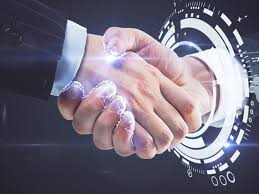

**What is market campaigns?**

Marketing campaigns promote products through different types of media, such as television, radio, print, and online platforms. Campaigns are not solely reliant on advertising and can include demonstrations, video conferencing, and other interactive techniques.

*This is a standard supervised classification task.A classification problem where we have to predictthe likelihood of a liability customer buying personal loans.*


**Context:**

The bank has a growing customer base.The bank wants to increase borrowers(asset customers)base to bring in more loan buisness and earn more through the interest on loans.So,the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors).A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.
The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan.This will increase the success ratio while at the same time reduce the cost of the campaign.

**Objective of the project:**
 
 The classification goal is to predict the likelihood of a liability customer buying personal loans.

# **1.Importing modules and libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


All the required modules and libraries are imported, if any new libraries to be imported its done when required in that particular cell. 

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


The provided file is imported and uploaded.

# **2.Loading the dataset**

In [6]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


**Attribute Information:**

 ● ID: Customer ID
 
 ● Age: Customer's age in completed years 

 ● Experience: #years of professional experience 

 ● Income: Annual income of the customer 

 ● ZIP Code: Home Address ZIP code. 

 ● Family: Family size of the customer 

 ● CCAvg: Avg. spending on credit cards per month  

 ● Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 

 ● Mortgage: Value of house mortgage if any. 

 ● Personal Loan: Did this customer accept the personal loan offered in the last campaign? 

 ● Securities Account: Does the customer have a securities account with the bank? 
 
 ● CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 

 ● Online: Does the customer use internet banking facilities? 

 ● Credit card: Does the customer use a credit card issued by the bank?

In [7]:
df.tail(10) #gives the dataset information og last 10 rows.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [82]:
df.describe() #describes many useful data like mean,count etc.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.info() #gives a brief info of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# **3.Preprocessing the data**

With the use of **describe function** we got the information that there are some **negative values** in the provided data which is undesired.
So using **df._get_numeric_data()** we convert the negative values into zeros.

In [9]:
num=df._get_numeric_data()
num[num<0]=0 #now all the negative values are converted to  zero

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values in the given dataset.

In [11]:
df.drop(['ID','Experience','ZIP Code'],axis = 1,inplace=True) #Id is not required as it is a noise,Experience and age are correlated.
                                                              #ZIP Code is also not required to train the model.

# **4.Exploratory Data Analysis**

In [12]:
df.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Various unique values of different columns is printed.

In [13]:
count=(df.Mortgage==0).sum()
print("Number of people with zero mortgage:",count)

Number of people with zero mortgage: 3462


In [14]:
count=(df.CreditCard==0).sum()
print("Number of people with zero CreditCard:",count)

Number of people with zero CreditCard: 3530


In [15]:
for i in range (0,11):
    count=df.iloc[:,i].value_counts()
    print(count)
    print("---------------------------------------------------------------------")

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
---------------------------------------------------------------------
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64
---------------------------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
---------------------------------------------------------------------
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.3

A for loop is runned across the columns to get the value counts.

# **5.Analysis of various information through plots**

# Univariate Analysis

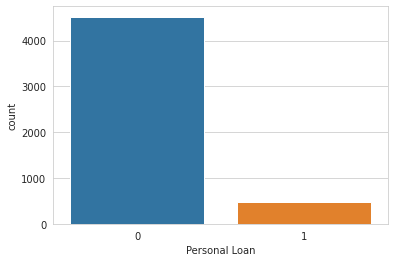

In [16]:
sns.set_style("whitegrid")
sns.countplot(df['Personal Loan']);

The graph depicts that more tham 4500 customers have not taken personal loans and very few i.e, less than 500 have taken the personal loan in the bank. This graph purely says that work need to be done to improve the number of customers to take loan.

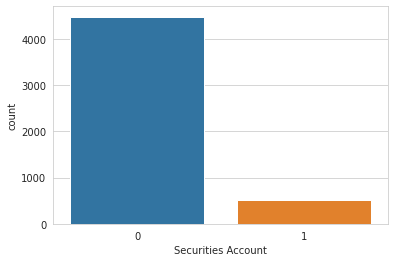

In [17]:
sns.set_style("whitegrid")
sns.countplot(df['Securities Account']);

This graph almost resembles same as that of the personal loan graph.

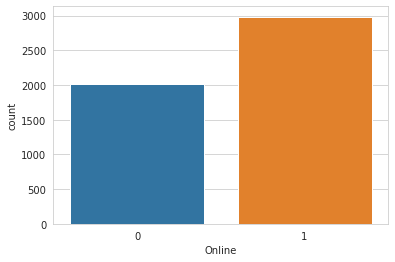

In [18]:
sns.set_style("whitegrid")
sns.countplot(df['Online']);

This is a positive graph that tells us that around 3000 customers use the online banking facilities,

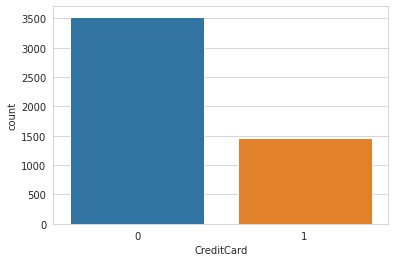

In [19]:
sns.set_style("whitegrid")
sns.countplot(df['CreditCard']);

A group of around 1500 customers use the creditcard facilities provided by the bank.

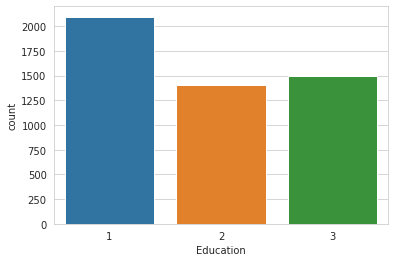

In [96]:
sns.set_style("whitegrid")
sns.countplot(df['Education']);

1: Undergrad; 2: Graduate; 3: Advanced/Professional

The graph shows that there are more undergraduates in the group of bank customers.

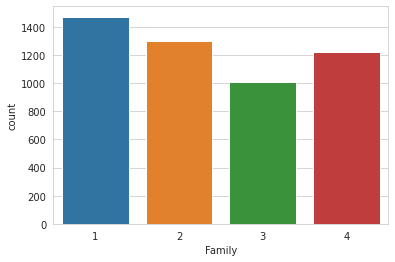

In [99]:
sns.set_style("whitegrid")
sns.countplot(df['Family']);

The distribution of family.

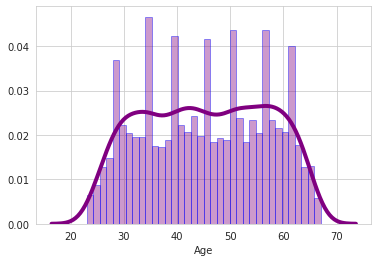

In [97]:
sns.distplot(df['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4});

The data of age need not to be transformed.

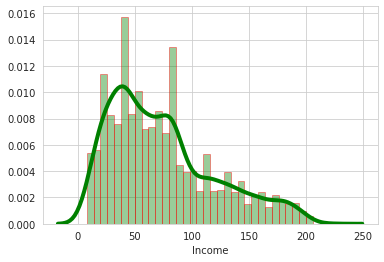

In [98]:
sns.distplot(df['Income'], hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4});

The data of income need to be transformed.

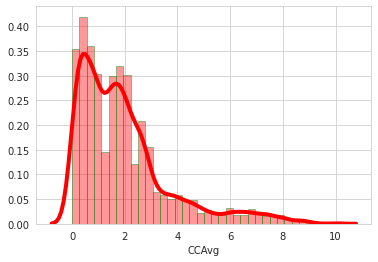

In [100]:
sns.distplot(df['CCAvg'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4});

Even the data of CCAvg need to be transformed.

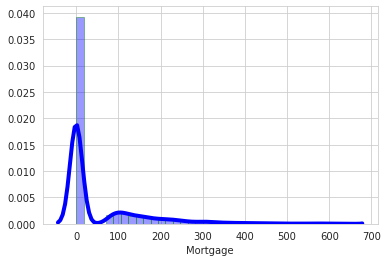

In [101]:
sns.distplot(df['Mortgage'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4});

The graph purely shows that binning the data is better option than transforming it.

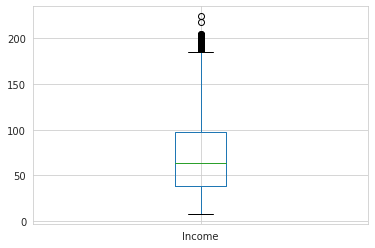

In [102]:
df.boxplot(column='Income'); #from this we come to know that there is outliers in this graph.

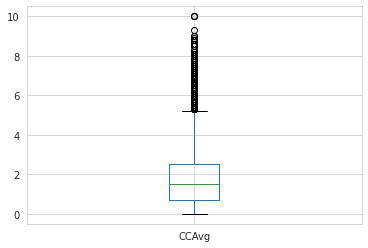

In [103]:
df.boxplot(column='CCAvg');  #from this we come to know that there is outliers in this graph.

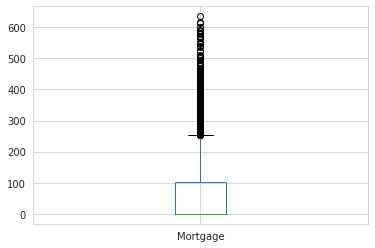

In [104]:
df.boxplot(column='Mortgage');#from this we come to know that there is outliers in this graph.

# Bivariate Analysis and Multivariate Analysis

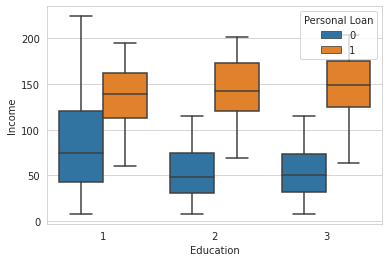

In [105]:
sns.boxplot(x="Education",y="Income",hue='Personal Loan',data=df);

From the above graph we come to know that considering all the sectors of the education level,the customers with high income is granted the loan facilities from the bank.

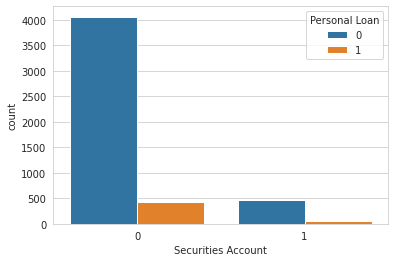

In [106]:
sns.countplot(x="Securities Account",data=df,hue="Personal Loan");

Most of the customers who have the securities account does not have the personal loan.

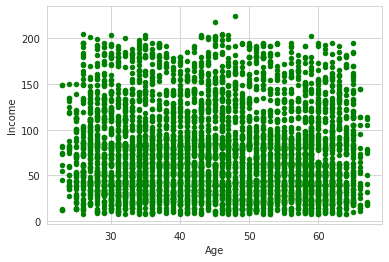

In [107]:
df.plot(x='Age', y='Income',kind='scatter',color='green')
plt.show()

The graph shows us that there is uniform distribution between income and age.

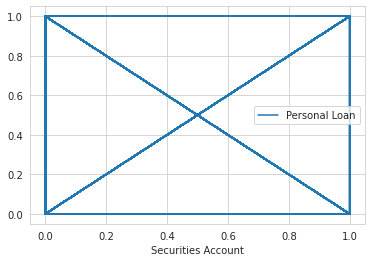

In [108]:
df.plot(x='Securities Account', y='Personal Loan')
plt.show()

The interconnection between the securities account and the personal loan of the customers.

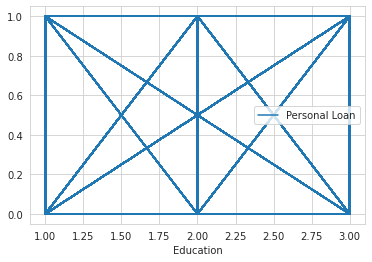

In [109]:
df.plot(x='Education', y='Personal Loan')
plt.show()

Its a good looking plot,it shows us the interconnections between the education and the personal loan.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


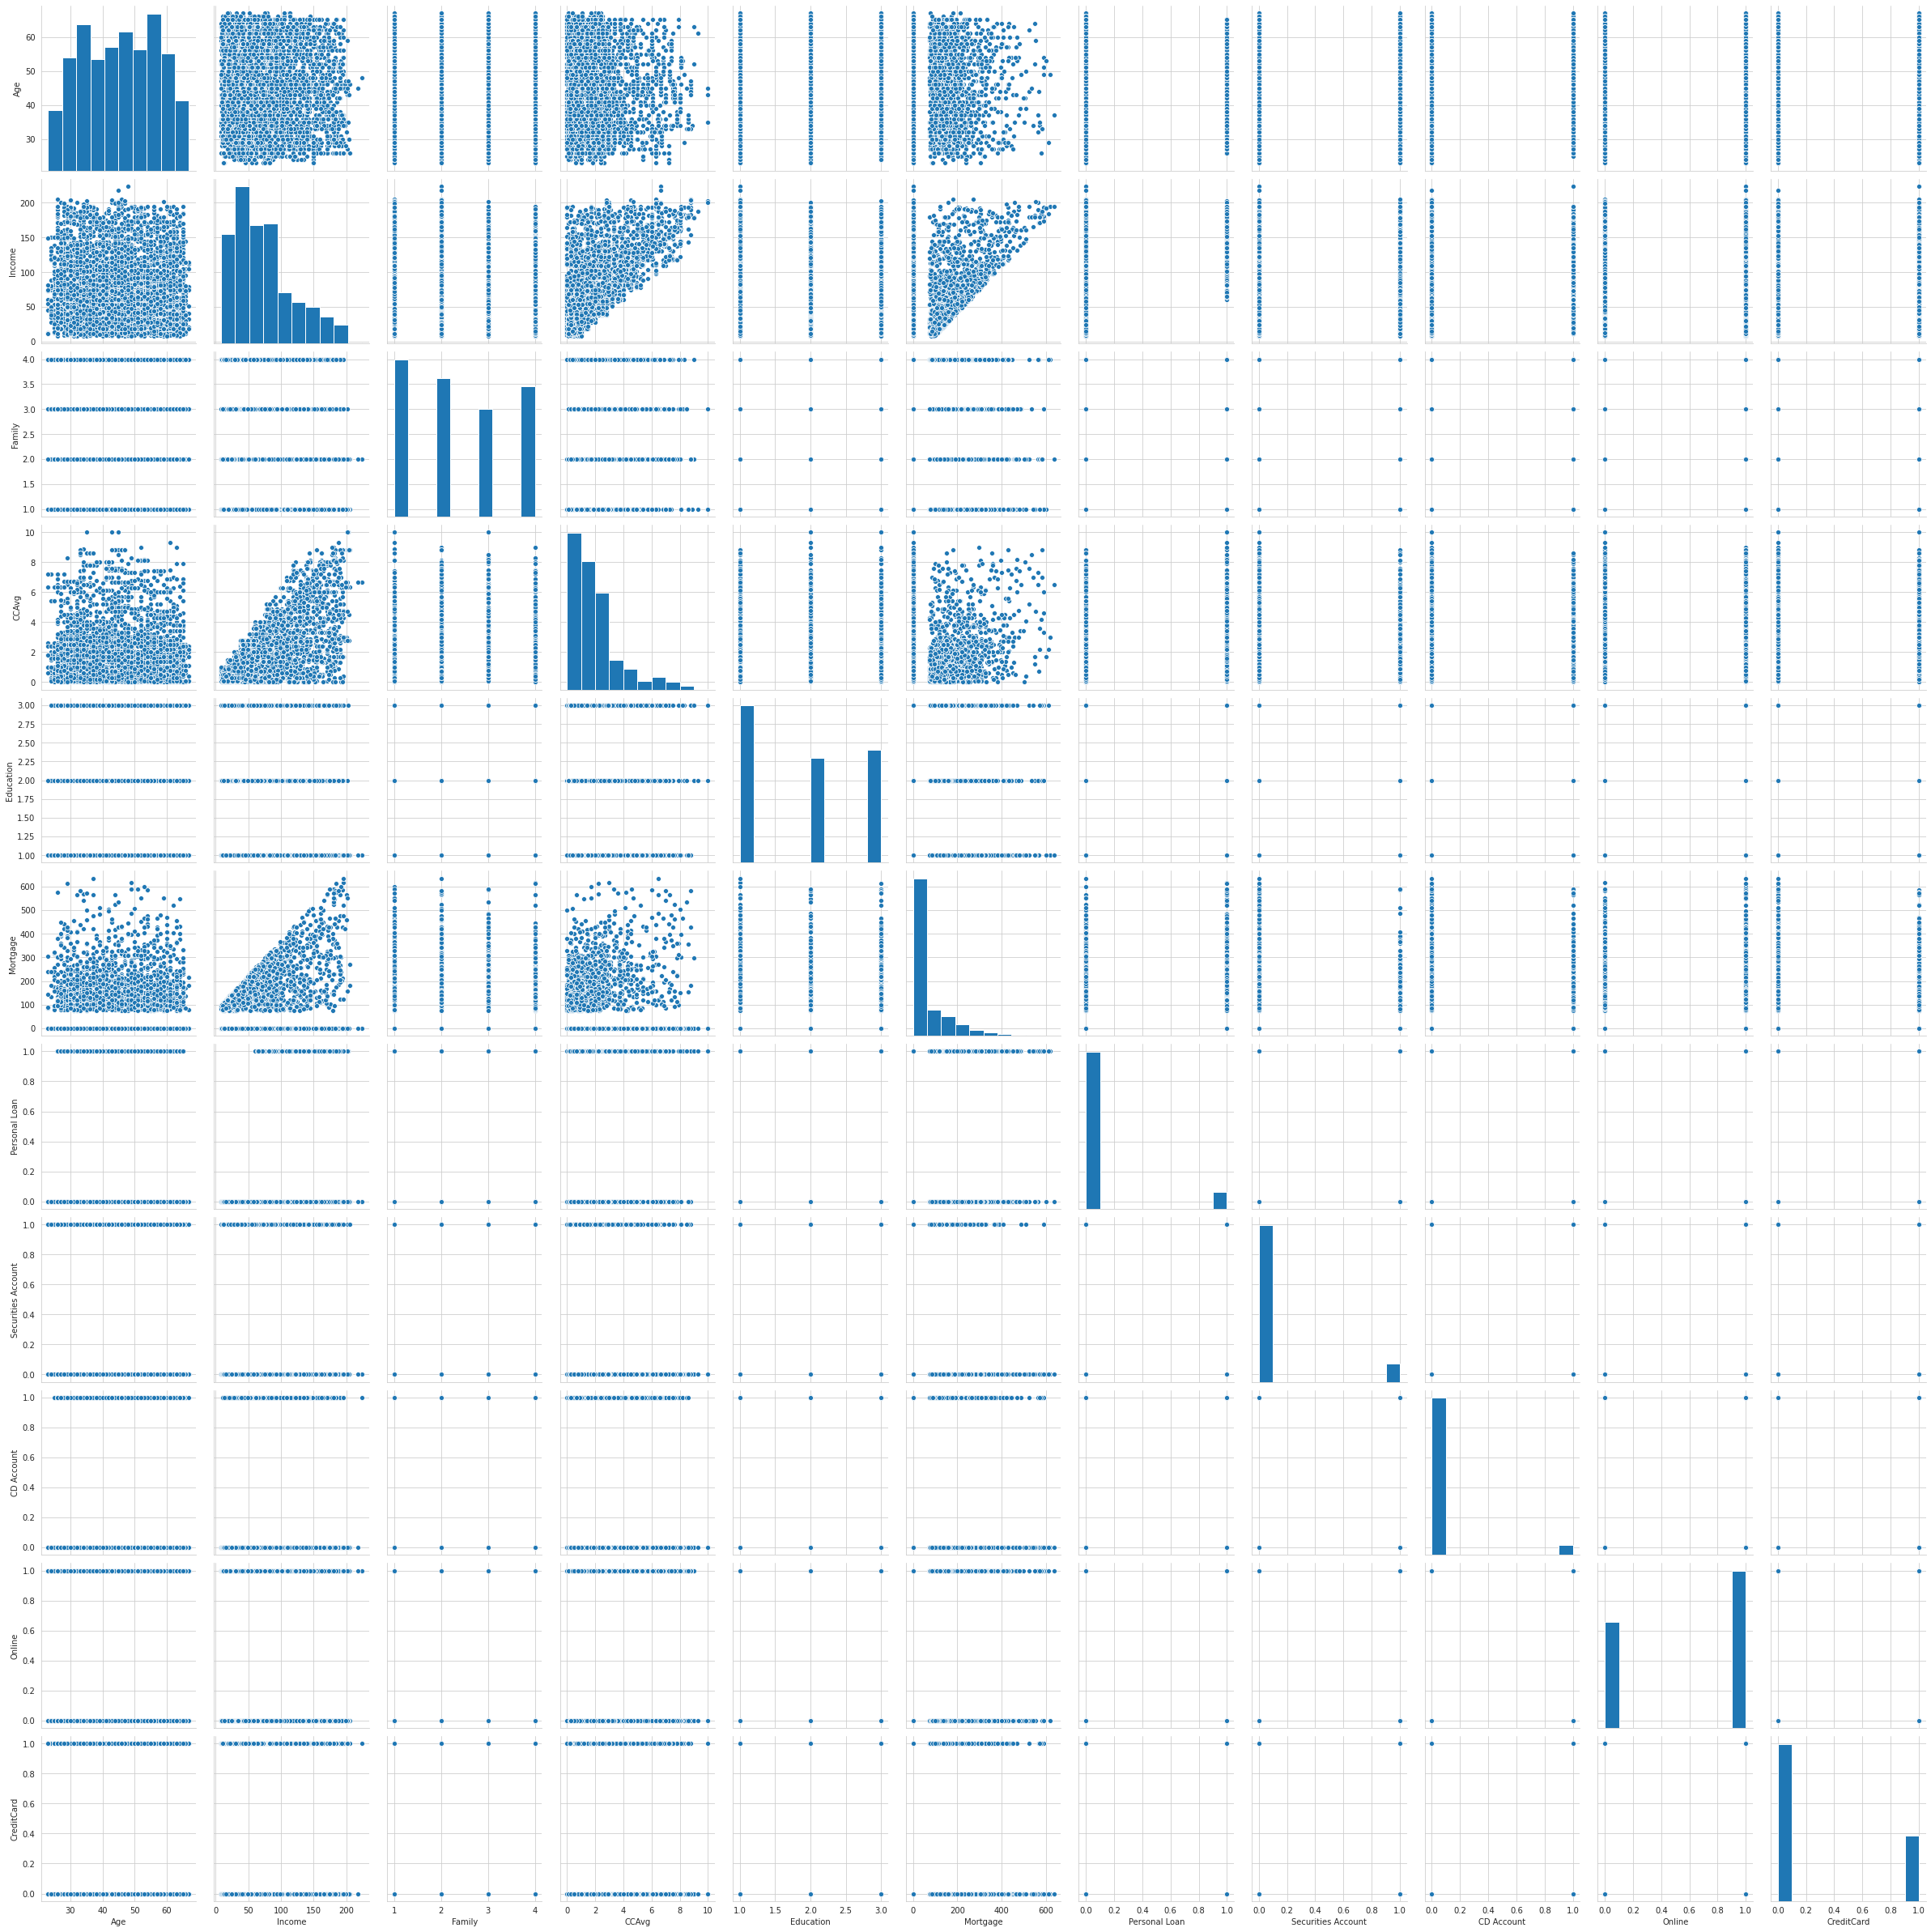

In [110]:
sns.set_style("whitegrid")
sns.pairplot(df,size=3); #brief of all the graphs


<Figure size 800x640 with 0 Axes>

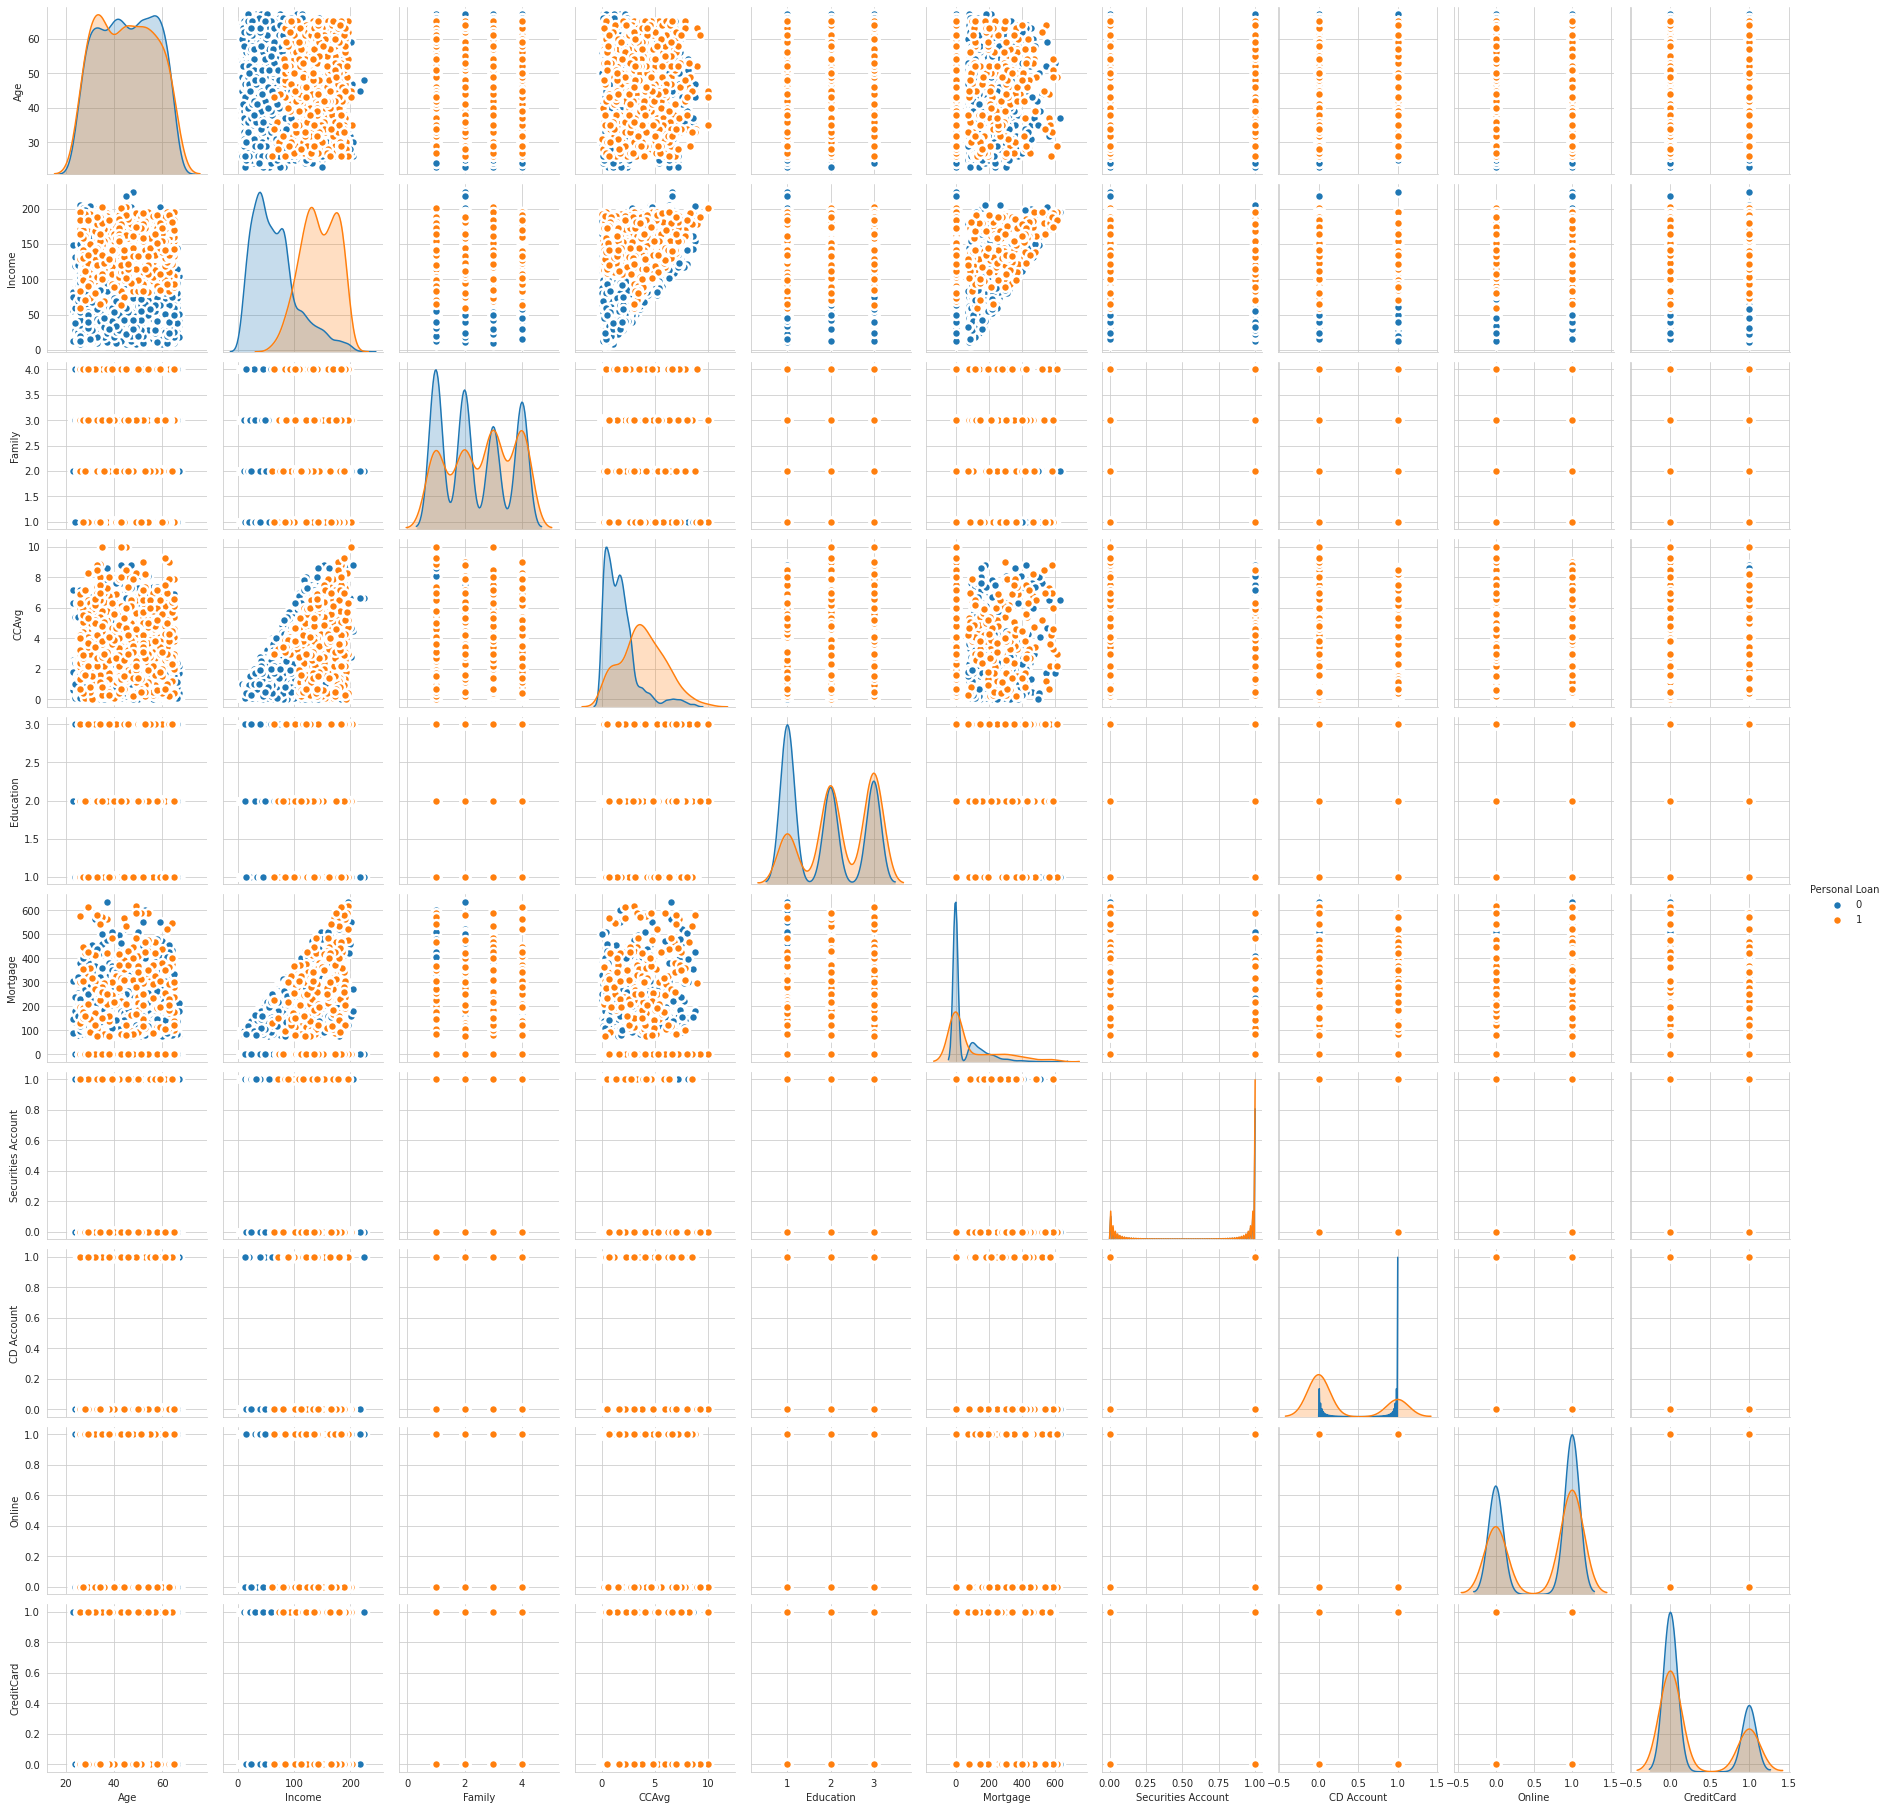

In [111]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="Personal Loan", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show() #these pairplots gives us information of all data with respect to personal loan.

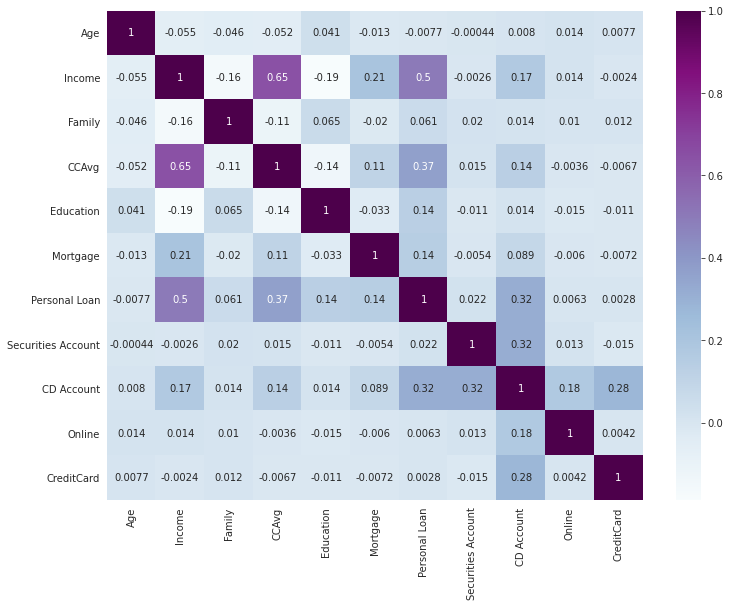

In [112]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True, cmap="BuPu" );

From this we come to know that age and experience are strongly correlated,so we can drop the experience column while making the model.

# **5. Training of model and Normalisation of data**

Transformations of feature variables

power transformer is better than log transformations so this is used.

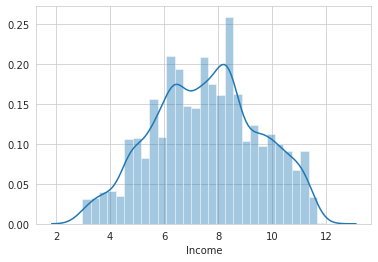

In [20]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
temp=pt.transform(df['Income'].values.reshape(-1,1))
df['Income']=temp
sns.distplot(df['Income']);


In [ ]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
temp=pt.transform(df['CCAvg'].values.reshape(-1,1))
df["CCAvg"]=temp
sns.distplot(df['CCAvg']);

In [115]:
df["Mortgage_New"]=pd.cut(df['Mortgage'],
                  bins=[0,100,200,300,400,500,600,700],
                  labels=[0,1,2,3,4,5,6],include_lowest=True)
df.drop("Mortgage",axis=1,inplace=True) 

For mortgage it is better to use bins instead of applying power transformation.

To verify the removal of outliers for income and ccavg.

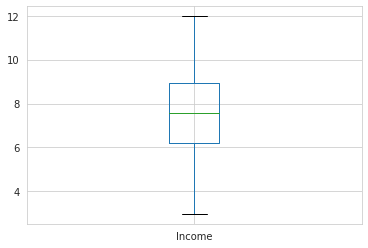

In [116]:
df.boxplot(column='Income'); 

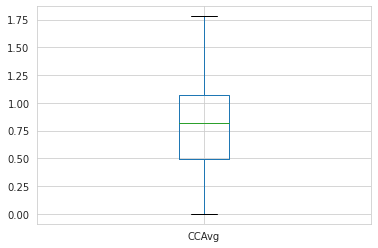

In [117]:
df.boxplot(column='CCAvg'); 

From the above two graphs we can clearly see that all the outliers have been removed.

In [21]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Personal Loan','Family'],axis=1)
y=df['Personal Loan']

In [22]:
x.head()

,Age,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,1.6,1,0,1,0,0,0
1,45,5.876952,1.5,1,0,1,0,0,0
2,39,3.504287,1.0,1,0,0,0,0,0
3,35,8.983393,2.7,2,0,0,0,0,0
4,35,6.597314,1.0,2,0,0,0,0,1


for the training testing process for the x variable family is dropped as it is not related that much to the personal loan and as we have particularly taken personal loan for the y variable so its also dropped in particular for the x variable. It is split in the ratio of 70:30(training:testing)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 9)
(1500, 9)
(3500,)
(1500,)


# **7.Model building**

In [24]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

**Why is standard scaler used?**

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

Instead of typing the code to run different models its better to define a function and to call it when required.

In [26]:
 def classify(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
  model.fit(x_train,y_train)
  y_pred1=model.predict(x_test)
  y_pred2=model.predict(x_train)
  print("Accuracy of training :",metrics.accuracy_score(y_train,y_pred2)*100)
  print("Accuracy of testing :",metrics.accuracy_score(y_test,y_pred1)*100)
  print("ROC score :",metrics.roc_auc_score(y_test,y_pred1)*100)
  result=classification_report(y_test,y_pred1)
  print("Classification report :",)
  print(result)
  print("Confusion Matrix :")
  confusion_matrix=pd.crosstab(y_test,y_pred1,rownames=["Actual"],colnames=["Predicted"])
  sns.heatmap(confusion_matrix,annot=True)

**Logistic Regression**



Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of training : 93.94285714285714
Accuracy of testing : 93.86666666666666
ROC score : 76.10468294460642
Classification report :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1372
           1       0.67      0.55      0.60       128

    accuracy                           0.94      1500
   macro avg       0.82      0.76      0.79      1500
weighted avg       0.93      0.94      0.94      1500

Confusion Matrix :


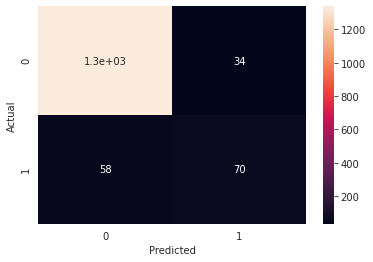

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
classify(model,x,y)  #warnings are ignored


Advantage of Logistic Regression is that it is incredibly easy to implement and very efficient to train. I typically start with a Logistic Regression model as a benchmark and try using more complex algorithms from there on.

**Decision Tree Classifier**

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Accuracy of training : 98.4857142857143
Accuracy of testing : 96.6
ROC score : 87.16176202623906
Classification report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.83      0.76      0.79       128

    accuracy                           0.97      1500
   macro avg       0.90      0.87      0.89      1500
weighted avg       0.96      0.97      0.97      1500

Confusion Matrix :
Decision Tree Graph :


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


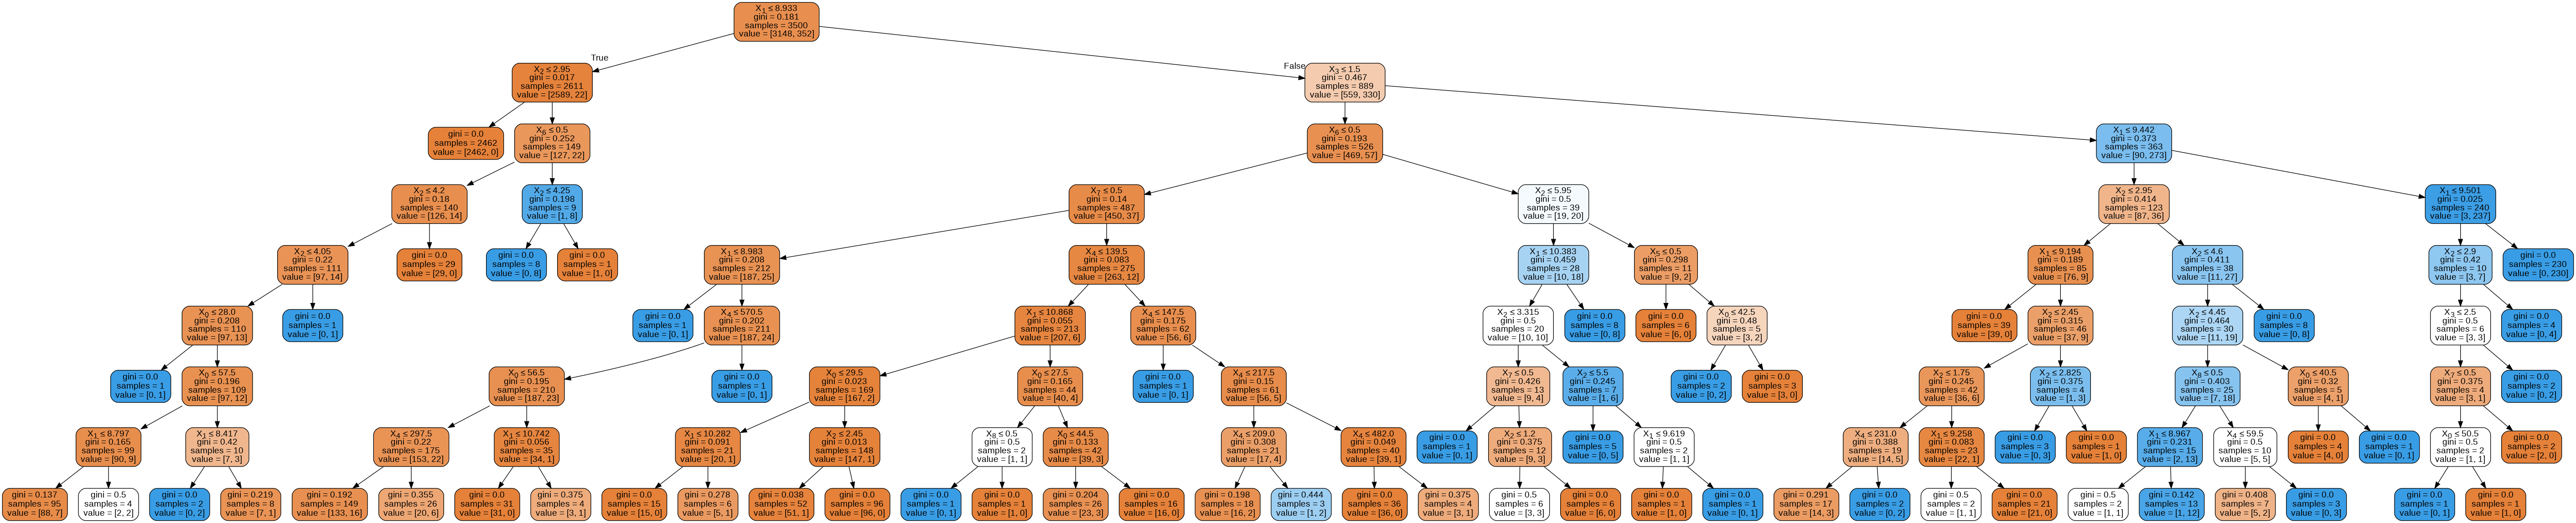

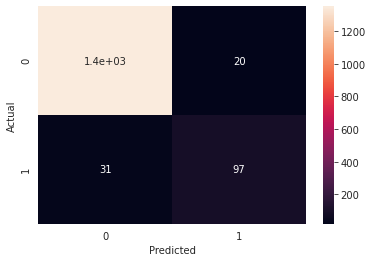

In [28]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0,max_depth=8)
classify(model,x,y)
print("Decision Tree Graph :")
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #the decision tree is better viewed when it is zoomed in.

Decision trees perform classification without requiring much computation. Decision trees are capable of handling both continuous and categorical variables. Decision trees provide a clear indication of which fields are most important for prediction or classification

**Random Forest Classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

Accuracy of training : 98.4857142857143
Accuracy of testing : 97.2
ROC score : 87.13556851311954
Classification report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.91      0.75      0.82       128

    accuracy                           0.97      1500
   macro avg       0.94      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500

Confusion Matrix :


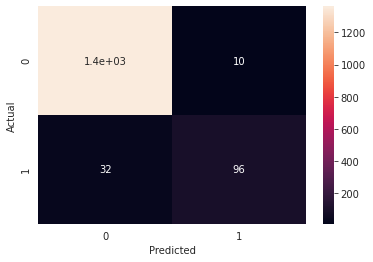

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)
classify(model,x,y)

It runs efficiently on large databases.
It can handle thousands of input variables without variable deletion.
It gives estimates of what variables are important in the classification.

**Extra Trees Classifier**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

Accuracy of training : 96.74285714285715
Accuracy of testing : 96.73333333333333
ROC score : 81.92192055393586
Classification report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1372
           1       0.96      0.64      0.77       128

    accuracy                           0.97      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500

Confusion Matrix :


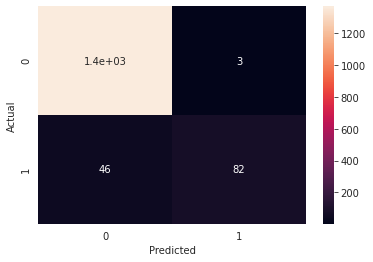

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(random_state=0,n_estimators=500,max_depth=8)
classify(model,x,y)

In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

**KNNeighbors Classifier**

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Accuracy of training : 94.11428571428571
Accuracy of testing : 93.26666666666667
ROC score : 66.21378462099126
Classification report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1372
           1       0.73      0.34      0.46       128

    accuracy                           0.93      1500
   macro avg       0.83      0.66      0.71      1500
weighted avg       0.92      0.93      0.92      1500

Confusion Matrix :


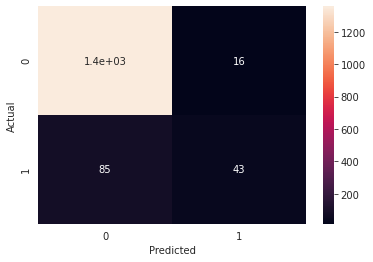

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classify(model,x,y)

Very simple implementation. Robust with regard to the search space; for instance, classes don't have to be linearly separable. Classifier can be updated online at very little cost as new instances with known classes are presented.

**GaussianNB**

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. ... Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

Accuracy of training : 88.91428571428571
Accuracy of testing : 89.2
ROC score : 73.55366253644314
Classification report :
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1372
           1       0.40      0.55      0.46       128

    accuracy                           0.89      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.91      0.89      0.90      1500

Confusion Matrix :


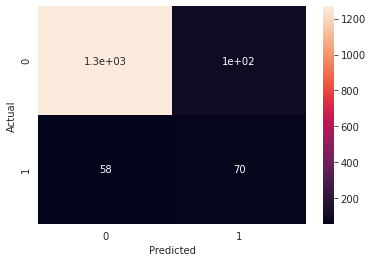

In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classify(model,x,y)

This algorithm is a good fit for real-time prediction, multi-class prediction, recommendation system, text classification, and sentiment analysis use cases. Naive Bayes Algorithm can be built using Gaussian, Multinomial and Bernoulli distribution. This algorithm is scalable and easy to implement for the large data set.

# **How neural networks are used for classification?**

Artificial neural networks are relatively crude electronic networks of neurons based on the neural structure of the brain. They process records one at a time, and learn by comparing their classification of the record (i.e., largely arbitrary) with the known actual classification of the record.

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron

In [33]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
print(clf.fit(x,y))  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


Accuracy of training : 96.25714285714285
Accuracy of testing : 95.53333333333333
ROC score : 82.32848943148689
Classification report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1372
           1       0.78      0.66      0.72       128

    accuracy                           0.96      1500
   macro avg       0.87      0.82      0.85      1500
weighted avg       0.95      0.96      0.95      1500

Confusion Matrix :


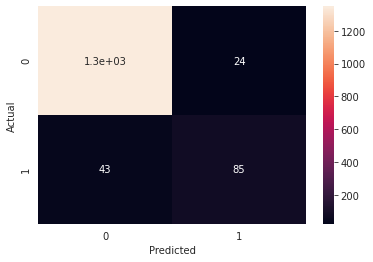

In [34]:
 from sklearn.neural_network import MLPClassifier
 model=MLPClassifier(random_state=0,max_iter=300)
 classify(model,x,y)

# **8.Overall Business Understanding of the model**

The main purpose of the project is to increase the number of customers taking the personal loan and minimize the marketing cost of the campaign,considering all the key aspects for the model(accuracy,recall,roc_score and the confusion matrix) . The top three suitable models are:
1.  **RandomForestClassifier-**
    Accuracy of training : 98.485,Accuracy of testing : 97.2, ROC score : 87.13,
    31 potential customers do not have loan.
2.  **DecisionTreeClassifier-**
    Accuracy of training : 96.74,Accuracy of testing : 96.73, ROC score : 81.92,
    32 potential customers do not have loan.
3.  **MLPClassifier(Neural network)-**
    Accuracy of training : 96.26,Accuracy of testing : 95.53, ROC score : 82.33
    43 potential customers do not have loan.

The remaining models(Logistic Regression,Extra Trees Classifier,KNNeighbors Classifier, also provide good outcomes but are not better than the above three. From the various plots taken in the project we get the information that considering all the sectors of the education level,the customers with high income is granted the loan facilities from the bank.Most of the customers who have the securities account does not have the personal loan.

**To increase the number of customers taking personal loans**, the bank can concentrate on the undergrads, providing them loans for the need of education with a suitable rate of intrest.For those who have securities account in the bank will get higher amount loans with less procedural way.

**The ways for minimizing the  marketing cost of the campaign without making a negative impact on the buisness** can be done through the following ways: concentrating mainly on the buisness and to reduce your marketing spend, start with the projects that aren’t producing sales. Digitalization of bank activities, giving guidelines and knowledge through e-advertisments.
some of the points like avoiding arbitrary cuts,transorming cost reductions and striking the right balance plays the key factor.

The main thing is, in the current trend of competition the one who is more efficient and more unique leads the go. So utilization of social medias and technoloy is important. To win customers for the bank boostage of brand,offering better products,increasing the presence of bank and making switching easier.

Through this project we have got opportunity to learn the beautiful concept of Machine Learning and its real life applications. The usage of various parts of learning for particular uses.The positive outcome of the project is most important and provides a satisfactory feel.

